# Simple_Moving_Average_Analysis
**Author**: Hansen Han  
**Date**: August 21st, 2023  

#### Load Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
import pandas as pd
from tqdm import trange # for tracking progress


#### Load Data

In [1]:
from crypto_backtesting import get_bitcoin_data
crypto_df = get_bitcoin_data(years=[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
crypto_df


/opt/anaconda3/envs/datasci7/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,timestamp,open,high,low,close,volume
0,2014-01-01 00:00:00,739.2800,739.2800,739.2800,739.2800,1.500000e-01
1,2014-01-01 01:00:00,742.9989,742.9989,742.9989,742.9989,3.720000e+00
2,2014-01-01 02:00:00,748.4900,748.8900,748.4900,748.8900,5.740000e+00
3,2014-01-01 03:00:00,740.0000,743.1000,740.0000,740.0000,2.256364e+00
4,2014-01-01 04:00:00,745.3100,745.3100,745.3100,745.3100,1.745600e+00
...,...,...,...,...,...,...
80036,2023-02-17 20:00:00,24523.0000,25023.0000,24523.0000,24834.0000,1.012941e+07
80037,2023-02-17 21:00:00,24833.0000,24841.0000,24426.0000,24495.0000,4.186570e+06
80038,2023-02-17 22:00:00,24479.0000,24745.0000,24057.0000,24692.0000,5.983257e+06
80039,2023-02-17 23:00:00,24687.0000,24745.0000,24525.0000,24582.0000,1.484912e+06


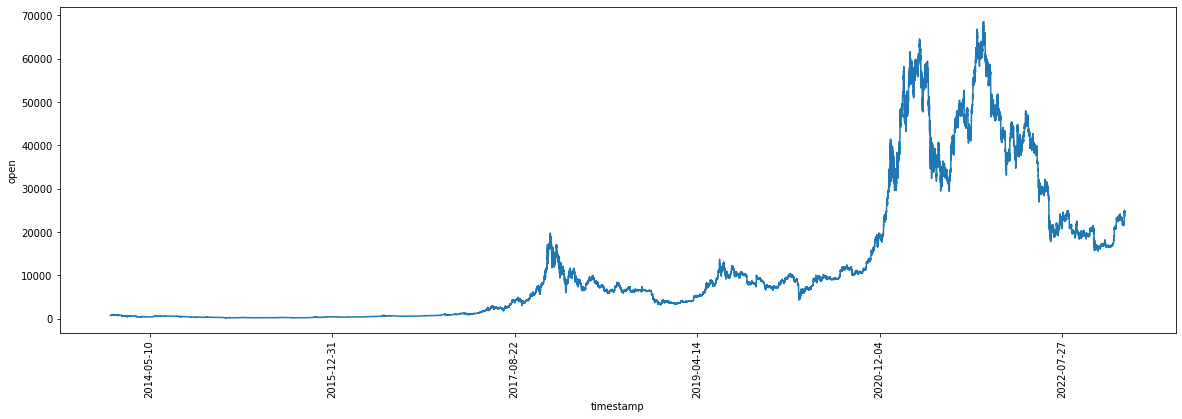

In [3]:
# View the data to make sure it looks right 
warnings.filterwarnings('ignore')
#plt.style.use('dark_background')

#sns.set_context("talk")
plt.figure(figsize=(20,6))
ax = sns.lineplot(x="timestamp", y="open", 
            data=crypto_df, ci=None)
ax.xaxis.set_major_locator(ticker.MaxNLocator(7))
plt.xticks(rotation="vertical")

plt.show() # looks right...

#### Simple Moving Average (SMA) Crossover Strategy Backtesting

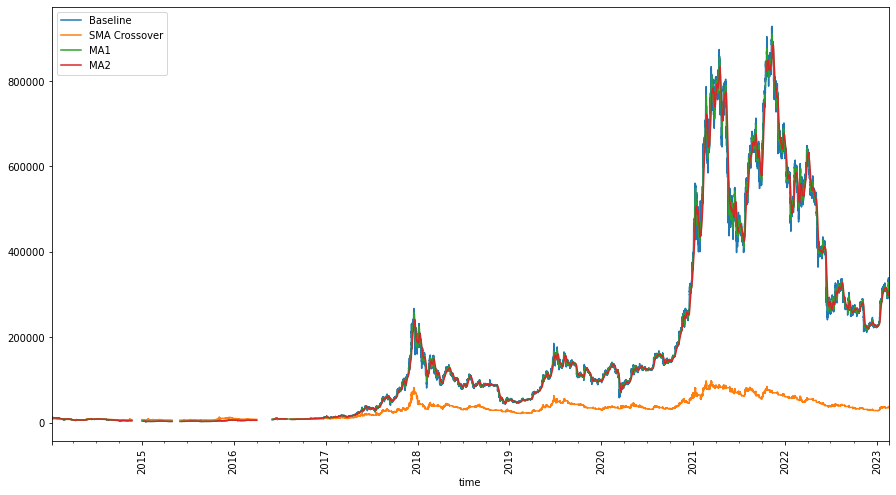

Hit Rate: 1.0
SMA Crossover Return Rate: 271.85 %
Buy & Hold Return Rate: 3224.86 %
Median Return per Quarter: -0.02 %


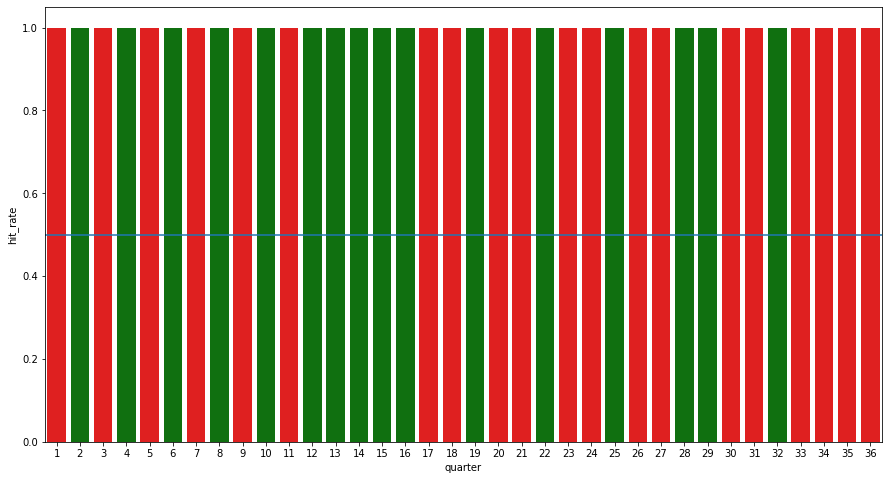

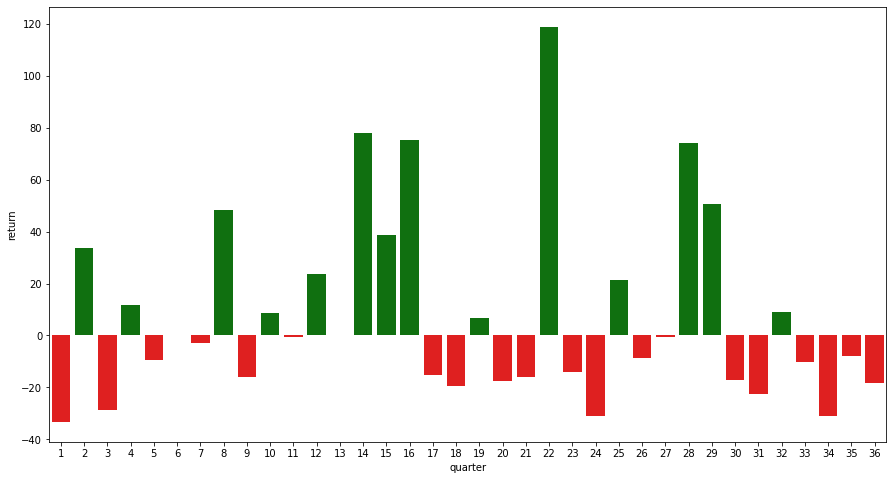

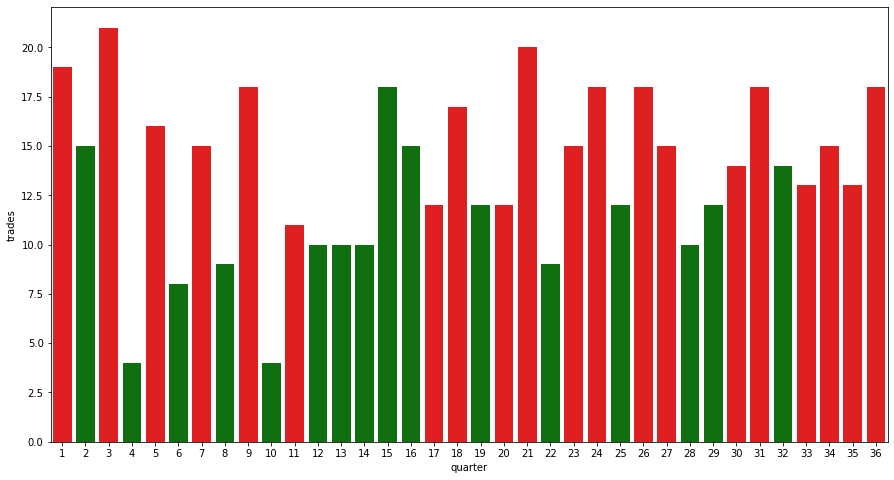

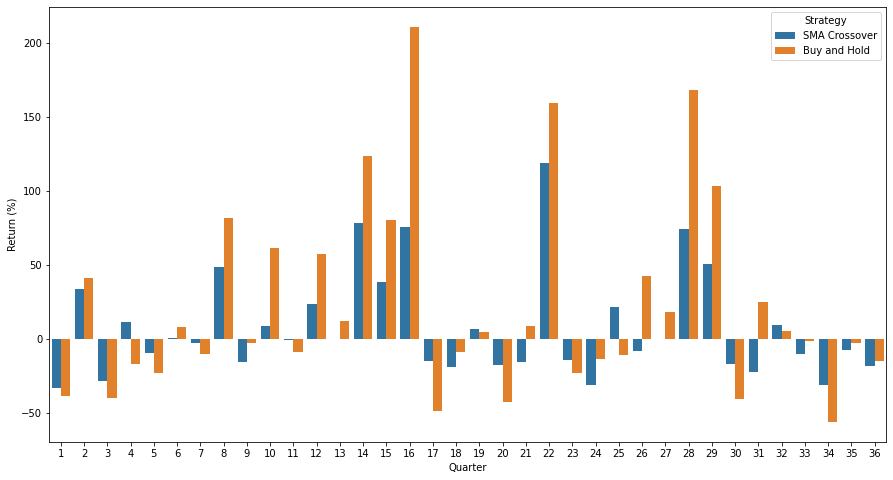

In [7]:
from crypto_backtesting import sma_crossover_backtester, plot_quarterly_data
import statistics

# Run the crossover backtester on the whole dataset 
backtest_results = sma_crossover_backtester(
            sampled_data = crypto_df,
            order_sizing = 1,
            ma1_length = 48, 
            ma2_length = 168, 
            starting_capital = 10000,
            display_results=True,
            shorting_allowed=False,
            fixed_fee = False,
            record_balance = True,
            show_moving_averages = True,
            annual_taxes = True,
            tax_percentage = 0.3,
            fee = 0.5
        )

# Interpret backtest results
import statistics
#print("Sharpe Ratio:", round(backtest_results['sharpe_ratio'],2))
print("Hit Rate:", backtest_results['hit_rate'])
print("SMA Crossover Return Rate:", round(backtest_results['final_return_rate']*100,2), "%")
print("Buy & Hold Return Rate:", round(backtest_results['baseline_return_rate']*100,2), "%")
print("Median Return per Quarter:", round(statistics.median(backtest_results['quarter_return_rates']*100), 2), "%")

plot_quarterly_data(backtest_results)

### What are the optimal parameters for SMA crossover strategy? 

In [ ]:
from crypto_backtesting import run_multiple_backtests


In [22]:
result_df = run_multiple_backtests(
    shorting_allowed = False,
    num_runs = 100,
    fixed_fee = False,
    crypto_df = crypto_df,
    strategy = "simple moving average crossover"
)

result_df
# much faster!

,ma1_length,ma2_length,cumulative_return,cumulative_baseline_return,profitable_quarters,total_trades,quarters_beating_baseline_results,strategy_quarterly_stdev,baseline_quarterly_stdev
0,393,733,16.102713,32.248566,16,97,0.39,0.447609,0.643615
1,599,981,13.501647,32.248566,12,69,0.36,0.433306,0.643615
2,956,998,6.802271,32.248566,15,136,0.31,0.380017,0.643615
3,467,1031,10.144268,32.248566,11,59,0.31,0.441763,0.643615
4,805,914,13.169904,32.248566,14,103,0.33,0.413569,0.643615
...,...,...,...,...,...,...,...,...,...
95,653,991,12.687034,32.248566,14,69,0.39,0.426794,0.643615
96,563,731,13.773082,32.248566,14,112,0.31,0.445639,0.643615
97,470,999,12.548606,32.248566,12,65,0.33,0.443621,0.643615
98,49,131,-0.137479,32.248566,15,620,0.31,0.357616,0.643615


In [26]:
# look for
result_df[result_df.quarters_beating_baseline_results == max(result_df.quarters_beating_baseline_results)]

,ma1_length,ma2_length,cumulative_return,cumulative_baseline_return,profitable_quarters,total_trades,quarters_beating_baseline_results,strategy_quarterly_stdev,baseline_quarterly_stdev
24,97,319,9.697162,32.248566,16,242,0.44,0.408564,0.643615
76,646,741,12.606473,32.248566,15,135,0.44,0.437563,0.643615
84,636,674,9.862619,32.248566,13,211,0.44,0.443095,0.643615


In [27]:

result_shorting_df = run_multiple_backtests(
    shorting_allowed = True,
    num_runs = 100,
    fixed_fee = False,
    crypto_df = crypto_df,
    strategy = "simple moving average crossover"

)

result_shorting_df

,ma1_length,ma2_length,cumulative_return,cumulative_baseline_return,profitable_quarters,total_trades,quarters_beating_baseline_results,strategy_quarterly_stdev,baseline_quarterly_stdev
0,729,745,-0.466861,32.248566,18,268,0.28,0.510279,0.643615
1,352,858,26.789149,32.248566,23,75,0.33,0.459060,0.643615
2,152,487,4.065166,32.248566,22,146,0.36,0.485691,0.643615
3,206,1010,39.369995,32.248566,21,58,0.25,0.552508,0.643615
4,828,832,-0.126300,32.248566,17,459,0.31,0.475265,0.643615
...,...,...,...,...,...,...,...,...,...
95,581,682,5.593672,32.248566,17,136,0.39,0.488013,0.643615
96,355,825,14.735440,32.248566,22,78,0.31,0.456745,0.643615
97,368,829,13.640836,32.248566,22,79,0.31,0.463197,0.643615
98,629,693,3.501711,32.248566,16,161,0.39,0.497265,0.643615


In [29]:
# what is the highest performing strategy?
result_shorting_df[result_shorting_df.cumulative_return == max(result_shorting_df.cumulative_return)]

,ma1_length,ma2_length,cumulative_return,cumulative_baseline_return,profitable_quarters,total_trades,quarters_beating_baseline_results,strategy_quarterly_stdev,baseline_quarterly_stdev
21,375,973,47.168996,32.248566,21,64,0.31,0.531873,0.643615


In [33]:
# are there any strategies that consistently beat buy and hold?
result_shorting_df[result_shorting_df.quarters_beating_baseline_results > 0.5]

,ma1_length,ma2_length,cumulative_return,cumulative_baseline_return,profitable_quarters,total_trades,quarters_beating_baseline_results,strategy_quarterly_stdev,baseline_quarterly_stdev


In [35]:
# look for strategies that have lower standard deivation and higher returns
result_shorting_df[result_shorting_df.strategy_quarterly_stdev < result_shorting_df.baseline_quarterly_stdev][result_shorting_df.cumulative_return > result_shorting_df.cumulative_baseline_return]

,ma1_length,ma2_length,cumulative_return,cumulative_baseline_return,profitable_quarters,total_trades,quarters_beating_baseline_results,strategy_quarterly_stdev,baseline_quarterly_stdev
3,206,1010,39.369995,32.248566,21,58,0.25,0.552508,0.643615
21,375,973,47.168996,32.248566,21,64,0.31,0.531873,0.643615
39,252,1069,37.717707,32.248566,19,58,0.25,0.568679,0.643615
76,345,944,38.355311,32.248566,21,68,0.31,0.513252,0.643615


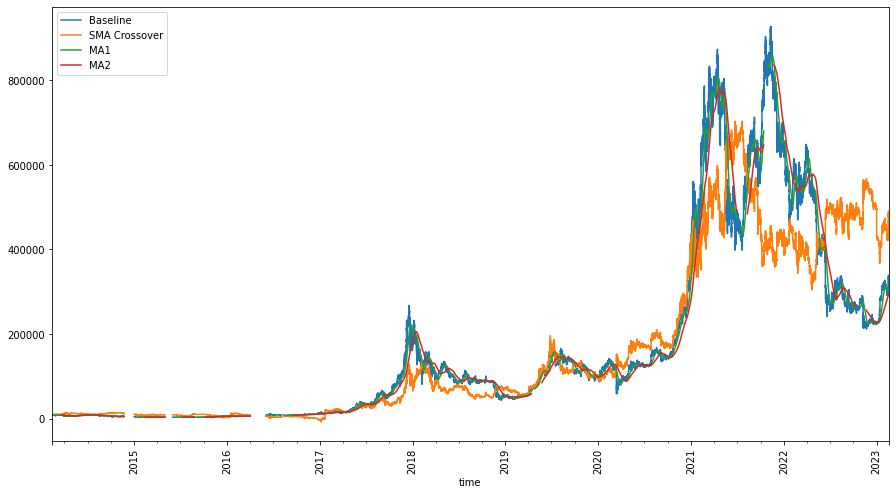

In [30]:
backtest_results = sma_crossover_backtester(
        sampled_data=crypto_df,
        order_sizing=1,
        ma1_length=375,
        ma2_length=973,
        starting_capital=10000,
        display_results=True,
        shorting_allowed=True,
        fixed_fee=False,
        record_balance=True,
        show_moving_averages=True,
        annual_taxes=True,
        tax_percentage=0.3,
        fee=0
    )

In [ ]:
# Run all the combinations we want to look at 
today = datetime.now()
todays_date = today.strftime("%Y-%m-%d")

combo_1_results = run_multiple_backtests(shorting_allowed=True, num_runs=100, fixed_fee=True)
combo_1_results.to_csv("run_output/sma_crossover_shorting_no_fee_{todays_date}.csv".format(todays_date=todays_date))

combo_2_results = run_multiple_backtests(shorting_allowed=True, num_runs=100, fixed_fee=False)
combo_2_results.to_csv("run_output/sma_crossover_shorting_with_fee_{todays_date}.csv".format(todays_date=todays_date))

combo_3_results = run_multiple_backtests(shorting_allowed=False, num_runs=100, fixed_fee=True)
combo_3_results.to_csv("run_output/sma_crossover_no_shorting_no_fee_{todays_date}.csv".format(todays_date=todays_date))

combo_4_results = run_multiple_backtests(shorting_allowed=False, num_runs=100, fixed_fee=False)
combo_4_results.to_csv("run_output/sma_crossover_no_shorting_with_fee_{todays_date}.csv".format(todays_date=todays_date))